In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from astropy.io import ascii
from utils import col_names, relevant_indices, normalise_sdss_class
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#Run through lab 1

In [4]:
datasets = "../datasets/SuperCOSMOS/"

uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat", guess=False, Reader=ascii.FastNoHeader).to_pandas()
ukr823_df = ascii.read(datasets + "UKR823/sssedrpair.dat", guess=False, Reader=ascii.FastNoHeader).to_pandas()
ukj823_df = ascii.read(datasets + "UKJ823/sssedrpair.dat", guess=False, Reader=ascii.FastNoHeader).to_pandas()

In [5]:
names=[col_names[i] for i in relevant_indices]
uki823_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40
0,627905166,-1862044,22405186,22421181,10590948,10604948,161,42793408,-22923,17532226,...,-777,-23019,15.639,14.998,359.763288,-1.067042,19.127230,17.637123,15.888538,6
1,628109952,-662364,21782348,21792346,14279944,14289944,46,5089298,-20025,18211806,...,4639,-20435,17.703,17.800,359.880409,-0.379610,19.122244,18.505545,18.302338,6
2,628195987,-1076412,21517417,21529414,13006944,13018944,87,17260390,-21479,17841694,...,-51,-21669,16.723,16.460,359.929869,-0.616716,19.118631,17.716108,17.013582,6
3,628311942,-518403,21162509,21172507,14721942,14731942,57,7749678,-20599,18688688,...,-259,-20958,17.357,17.232,359.996295,-0.297037,19.114597,18.120455,17.692406,6
4,627218041,-1032678,24519637,24532633,13137958,13149958,84,14814466,-21295,17692354,...,111,-21519,16.848,16.623,359.369486,-0.591688,19.112507,17.852146,17.173191,6


In [38]:
uki823_df.iloc[:,29].max()

1040

In [6]:
colnames_relevant=[col_names[i] for i in relevant_indices]

In [7]:
#Get relevant column
data=uki823_df.iloc[:, relevant_indices]
data_ukr=ukr823_df.iloc[:, relevant_indices]
data = pd.DataFrame(data.values, columns = colnames_relevant)   
data_ukr=pd.DataFrame(data_ukr.values, columns=colnames_relevant)


In [8]:
#Q1
data_ukr.sample(7)

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
24821,321849,998587,20131775,20142772,89,23302462,-22101,29581116,20137743,19456832,...,16,4,0,0,0,0,7377,-22264,18243,18045
7761,627352835,1492864,24088745,24093744,14,6939842,-19564,29340542,24091449,20979079,...,0,0,0,0,0,0,-1030,-20476,20108,20150
22798,231536,606024,20414702,20418701,10,5635354,-18994,29708884,20416385,18251181,...,0,0,0,0,0,0,-718,-20192,20461,20485
20347,767533,269913,18760133,18779128,188,72091544,-24076,29925236,18770717,17217192,...,99,70,43,0,0,0,275,-24590,16611,15307
20688,1244044,2142472,17285511,17321502,405,98943632,-25128,29808282,17301604,22968123,...,207,171,129,3,0,16,-839,-26536,15700,13046
20754,4509,892423,21110521,21115519,9,5874864,-18780,29648256,21112953,19131616,...,0,0,0,0,0,0,953,-20094,20681,20600
9485,627523640,777819,23566882,23570881,8,4164376,-18610,29516382,23569181,18781924,...,0,0,0,0,0,0,-159,-20015,20437,20693


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 22 columns):
AREA          15645 non-null float64
IPEAK         15645 non-null float64
COSMAG        15645 non-null float64
ISKY          15645 non-null float64
A_U           15645 non-null float64
B_U           15645 non-null float64
THETA_U       15645 non-null float64
A_I           15645 non-null float64
B_I           15645 non-null float64
THETA_I       15645 non-null float64
BLEND         15645 non-null float64
QUALITY       15645 non-null float64
N(0,1)        15645 non-null float64
PRFMAG        15645 non-null float64
C_COSMAG      15645 non-null float64
C_PRFMAG      15645 non-null float64
RA_SDSS       15645 non-null float64
DEC_SDSS      15645 non-null float64
GMAG_SDSS     15645 non-null float64
RMAG_SDSS     15645 non-null float64
IMAG_SDSS     15645 non-null float64
CLASS_SDSS    15645 non-null float64
dtypes: float64(22)
memory usage: 2.6 MB


In [10]:
data.describe()

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
count,15645.000000,1.564500e+04,15645.000000,1.564500e+04,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,...,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000
mean,92.001151,1.319364e+07,-20152.272867,1.808098e+07,5423.954618,4149.977245,84.416874,4291.177181,3267.532886,81.601214,...,2716.035986,-20838.007670,17.481817,17.367207,174.007529,0.048635,19.528314,18.495397,17.893314,4.885331
std,314.990581,1.817166e+07,1971.753396,4.441520e+05,3550.485593,3341.520804,57.212674,1935.854217,1881.680318,55.967697,...,3628.301001,1759.041618,1.285655,1.894035,179.404607,0.724706,2.194382,1.931732,1.773068,1.449708
min,8.000000,1.297920e+06,-28893.000000,1.709983e+07,1633.000000,538.000000,0.000000,1551.000000,524.000000,0.000000,...,-8899.000000,-34317.000000,11.154000,4.781000,0.000165,-1.243447,8.985260,6.618781,6.940934,3.000000
25%,17.000000,2.348600e+06,-21393.000000,1.769842e+07,3434.000000,2121.000000,35.000000,3235.000000,2035.000000,30.000000,...,153.000000,-21599.000000,16.776000,16.536000,0.502112,-0.569497,18.465448,17.573668,17.055212,3.000000
50%,37.000000,3.912512e+06,-19703.000000,1.802993e+07,4537.000000,3286.000000,79.000000,4006.000000,3000.000000,73.000000,...,2189.000000,-20233.000000,17.858000,18.019000,0.969110,0.075373,19.967171,18.960104,18.355196,6.000000
75%,92.000000,1.417421e+07,-18561.000000,1.845908e+07,6325.000000,5203.000000,135.000000,4777.000000,4040.000000,134.000000,...,4545.000000,-19562.000000,18.471000,18.748000,359.492904,0.682301,21.087143,19.793398,19.087181,6.000000
max,24006.000000,1.210549e+08,-17410.000000,1.899585e+07,101032.000000,90696.000000,999.000000,59866.000000,55313.000000,179.000000,...,102961.000000,-18962.000000,19.292000,19.399000,359.999933,1.273383,22.999374,24.802490,27.166468,6.000000


In [11]:

from scipy.stats import skew, kurtosis
print('Skewness:\n{}'.format(skew(data)[:-1])) # Get rid of label column 
print('Kurtosis:\n{}'.format(kurtosis(data)[:-1])) # Get rid of label column

Skewness:
[39.52701171  1.7944605  -0.81314035  0.2067171   5.74555491  5.43048161
  1.44167041  5.5322817   4.58636765  0.24495602 25.10940122  4.62553686
  4.38586481 -1.71093567 -1.07119895 -1.66586925  0.06689555 -0.08039232
 -1.08216571 -1.08494137 -1.04758784]
Kurtosis:
[ 2.48040312e+03  2.14174386e+00 -4.78773454e-02 -1.00073631e+00
  7.93913068e+01  7.43785163e+01  1.93102345e+01  7.98630300e+01
  6.56068517e+01 -1.32855616e+00  1.12088952e+03  1.94168428e+01
  6.65893681e+01  3.70863017e+00  5.65796361e-01  3.38311479e+00
 -1.99551474e+00 -1.18556314e+00  1.10910105e+00  1.38891705e+00
  1.78147853e+00]


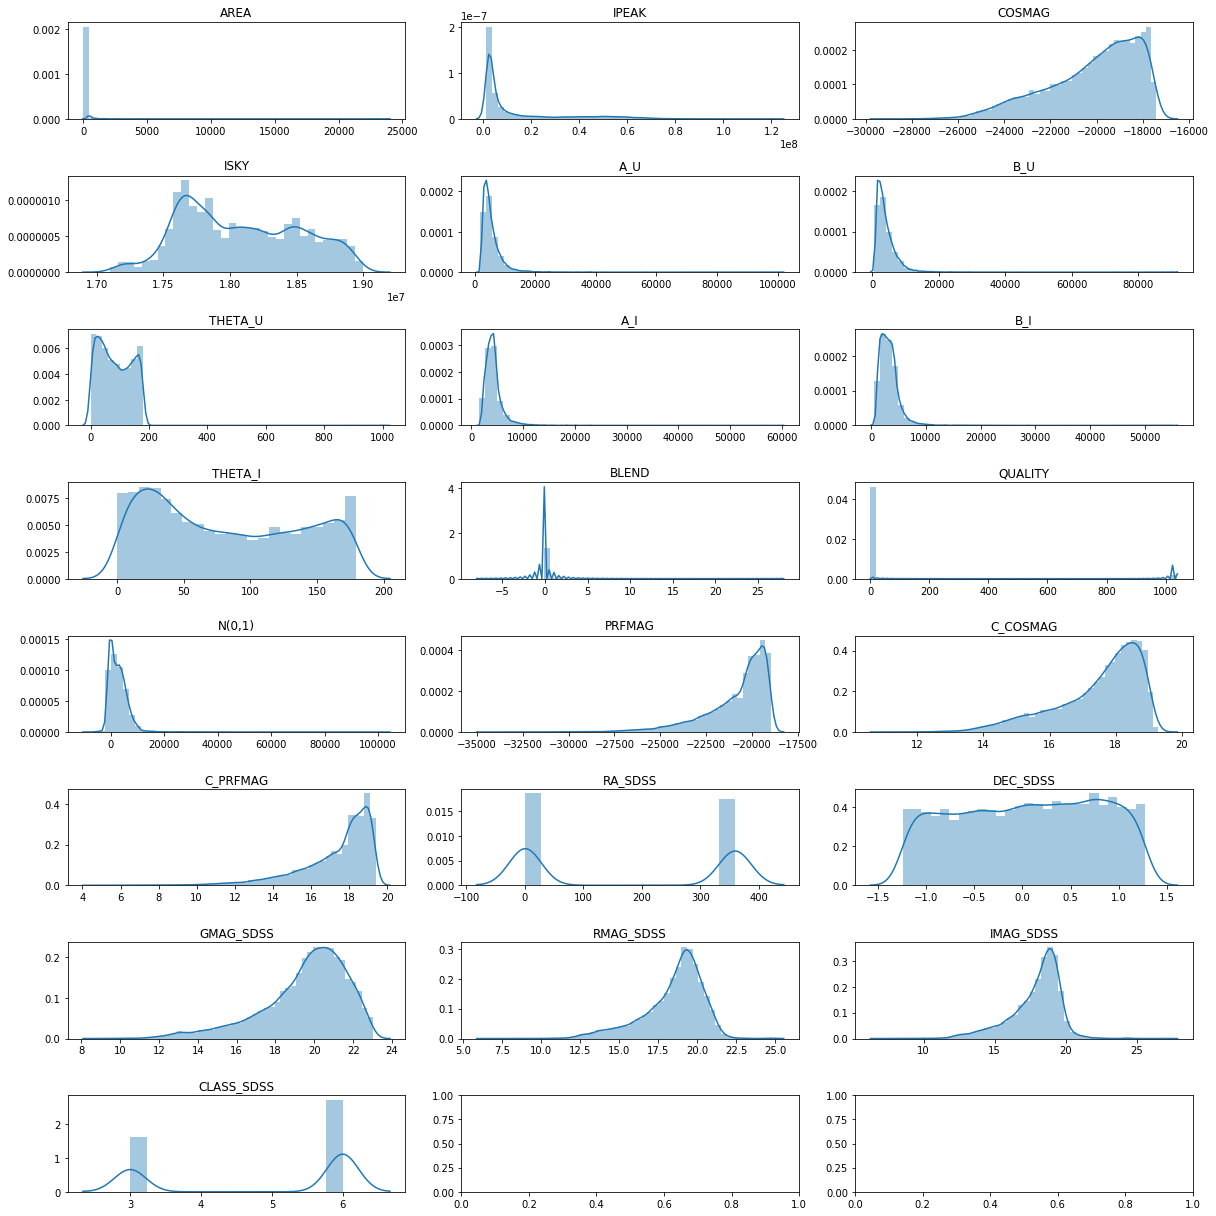

In [12]:
# Your code goes here
fig, ax = plt.subplots(8,3, figsize=(17,17))
ax=ax.flatten()
for i in range(len(colnames_relevant)):
    sns.distplot(data[colnames_relevant[i]].values.reshape(-1,), ax=ax[i], kde=True) # Reshape into 1D array
    ax[i].set_title(colnames_relevant[i]) # Subplot titles
    
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

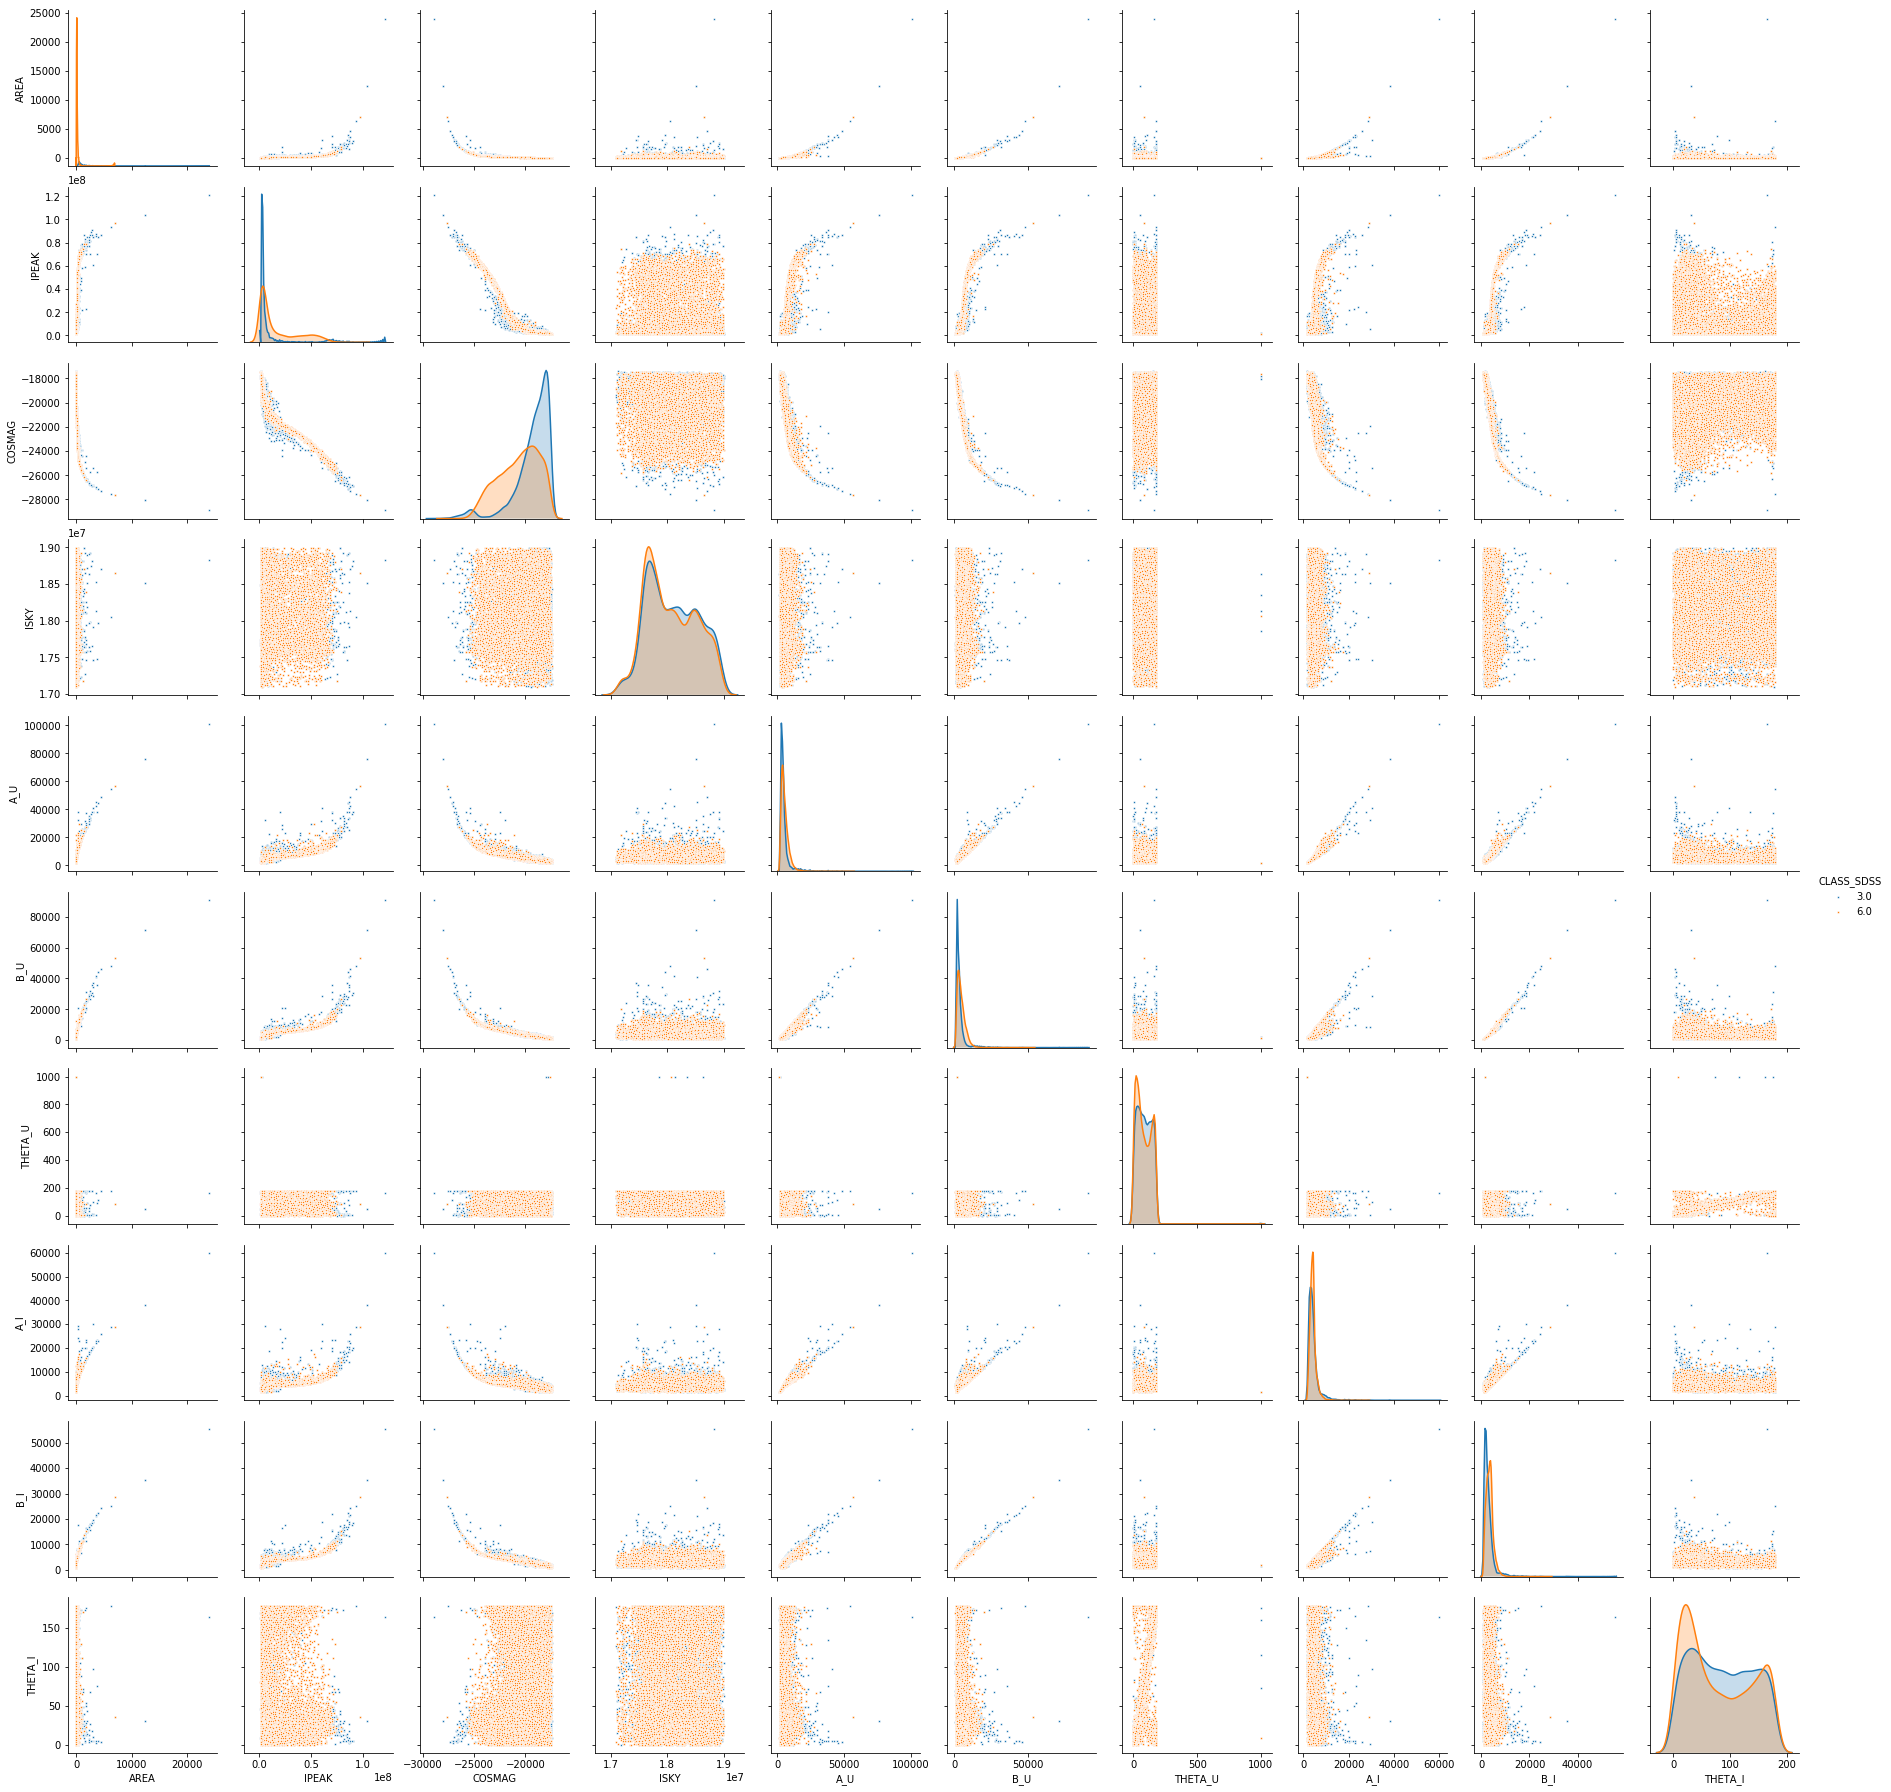

In [12]:
sns.pairplot(data, vars=colnames_relevant[0:10], hue='CLASS_SDSS', diag_kind = 'kde', plot_kws={'s' : 6})
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

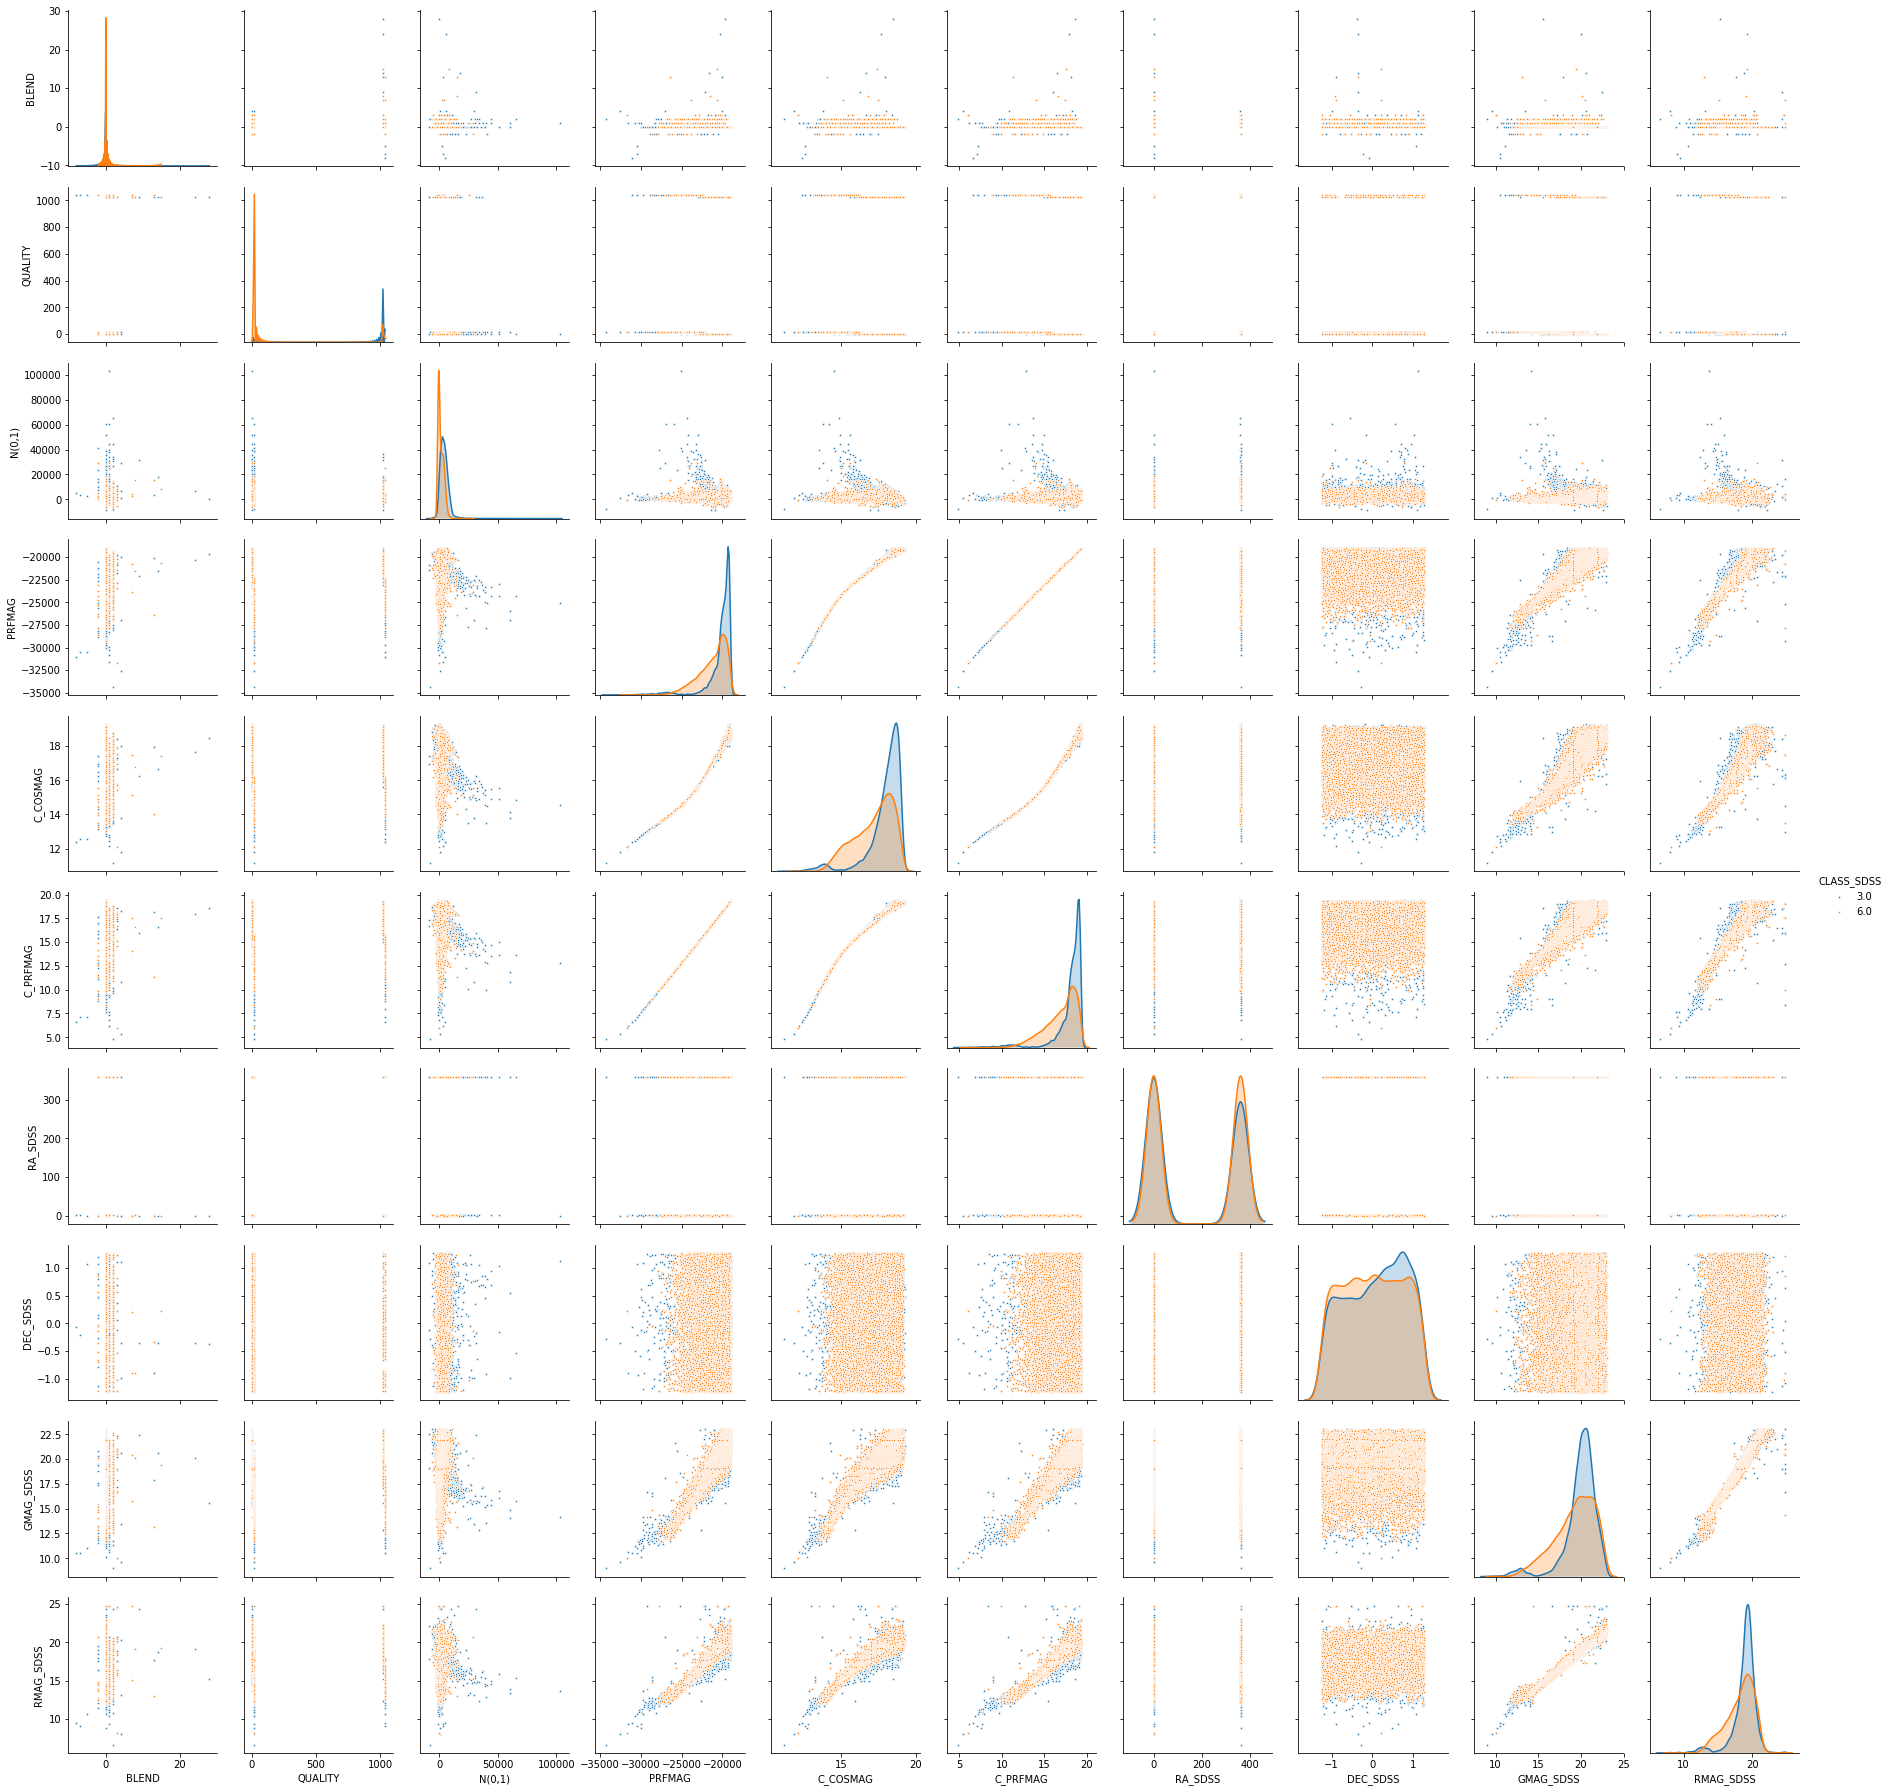

In [40]:
sns.pairplot(data, vars=colnames_relevant[10:20], hue='CLASS_SDSS', diag_kind = 'kde', plot_kws={'s' : 6})
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

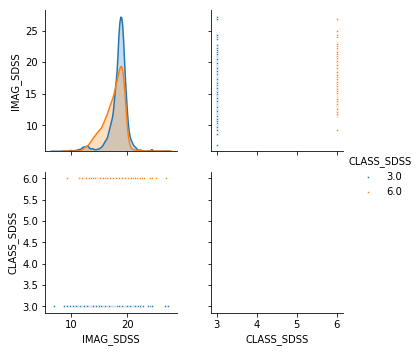

In [41]:
sns.pairplot(data, vars=colnames_relevant[20:30], hue='CLASS_SDSS', diag_kind = 'kde', plot_kws={'s' : 6})
plt.show

In [18]:
data_x=data.iloc[:,0:len(data.columns)-1]
data_y=data['CLASS_SDSS']

data_ukr_x=data_ukr.iloc[:,0:len(data_ukr.columns)-1]
data_ukr_y=data_ukr['CLASS_SDSS']

In [34]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

In [18]:
from sklearn.decomposition import PCA # Import the PCA module


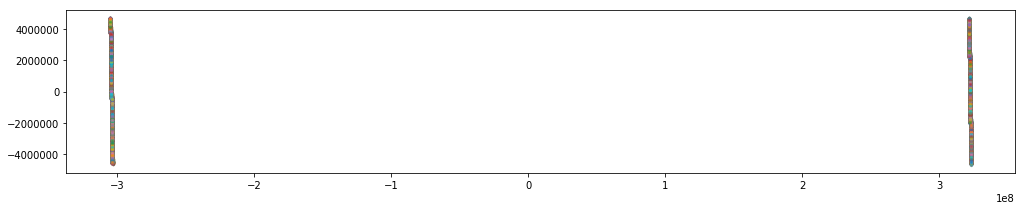

In [40]:


dim_1 = 1 # First dimension
dim_2 = 3 # Second dimension
X_pca_4d = PCA(n_components=4).fit_transform(data_ukr_x) # Initialise a PCA instance, fit it by using X_sc and then transform X_sc
plt.figure(figsize=(17,3))
scatter_2d_label(X_pca_4d[:, [dim_1,dim_2]], data_ukr_y)
# plt.title('Labelled data in 2-D PCA space')
# plt.xlabel('Principal component score 1')
# plt.ylabel('Principal component score 2')
# plt.legend(loc='upper right', scatterpoints=3) # Ask matplotlib to place the legend where it thinks best
plt.show()

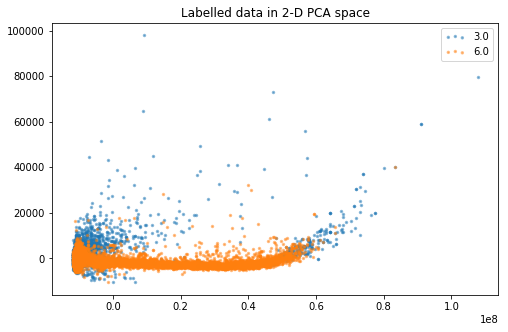

In [21]:


dim_1 = 0# First dimension
dim_2 = 2 # Second dimension
X_pca_4d = PCA(n_components=4).fit_transform(data_x) # Initialise a PCA instance, fit it by using X_sc and then transform X_sc
plt.figure(figsize=(8,5))
scatter_2d_label(X_pca_4d[:, [dim_1,dim_2]], data_y)
plt.title('Labelled data in 2-D PCA space')

plt.legend(loc='best', scatterpoints=3) # Ask matplotlib to place the legend where it thinks best
plt.show()

In [34]:
def kde_2d_label(X_2d, y):
    """Kernel density estimate in a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels correspodning to the entries in X_2d.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        sns.kdeplot(X_2d[y == target, 0], X_2d[y == target, 1], cmap=sns.dark_palette(color, as_cmap=True))


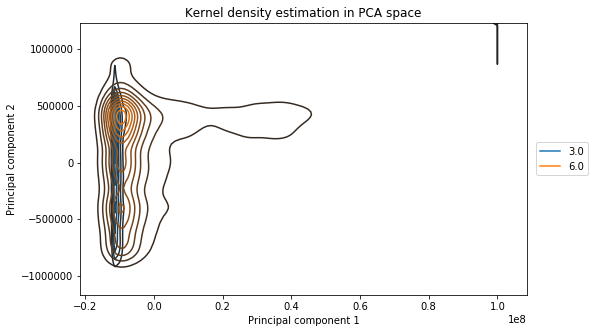

In [42]:
# The following commands are used to create an appropriate legend for the superimposed KDE plots
import matplotlib.lines as mlines
cats = np.unique(data_y)
color_palette = sns.color_palette(n_colors=cats.size)
patches = [mlines.Line2D([], [], color=color_palette[ii], label=cat) for ii, cat in enumerate(cats)]

plt.figure(figsize=(8,5))
kde_2d_label(X_pca_4d, data_y)
plt.title('Kernel density estimation in PCA space')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(patches, cats, loc='center left', scatterpoints=3, bbox_to_anchor=[1.01, 0.5]) # Use the custom legend entries
plt.show()

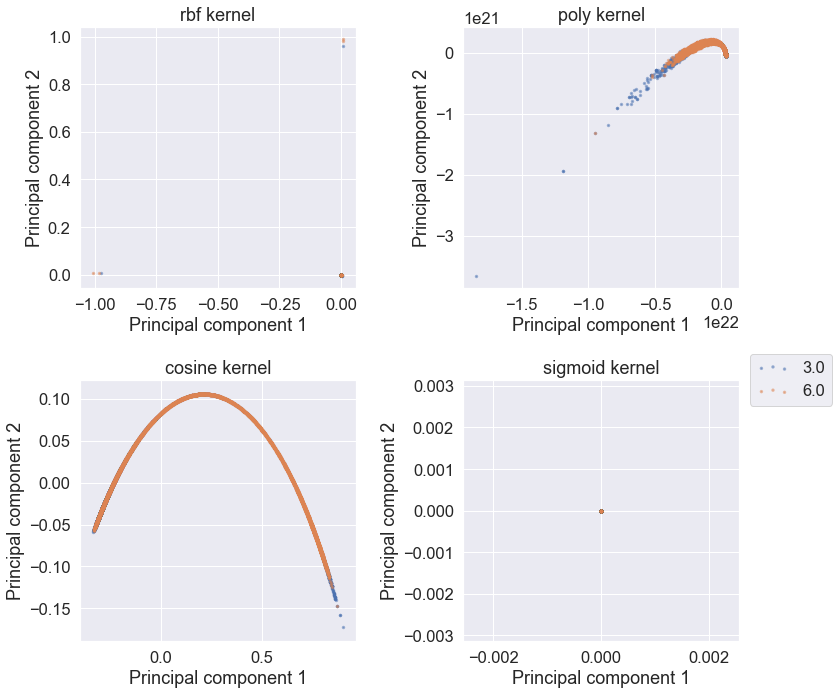

In [43]:
from sklearn.decomposition import KernelPCA


kernels = ['rbf', 'poly', 'cosine', 'sigmoid']

sns.set(font_scale=1.5)
fig, ax = plt.subplots(2,2,figsize=(12,10))
for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel).fit_transform(data_x)
    plt.subplot(2,2,ii+1)
    scatter_2d_label(X_kpca_2d, data_y)
    plt.title('{} kernel'.format(kernel))
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3)
fig.tight_layout()
plt.show()

KeyboardInterrupt: 

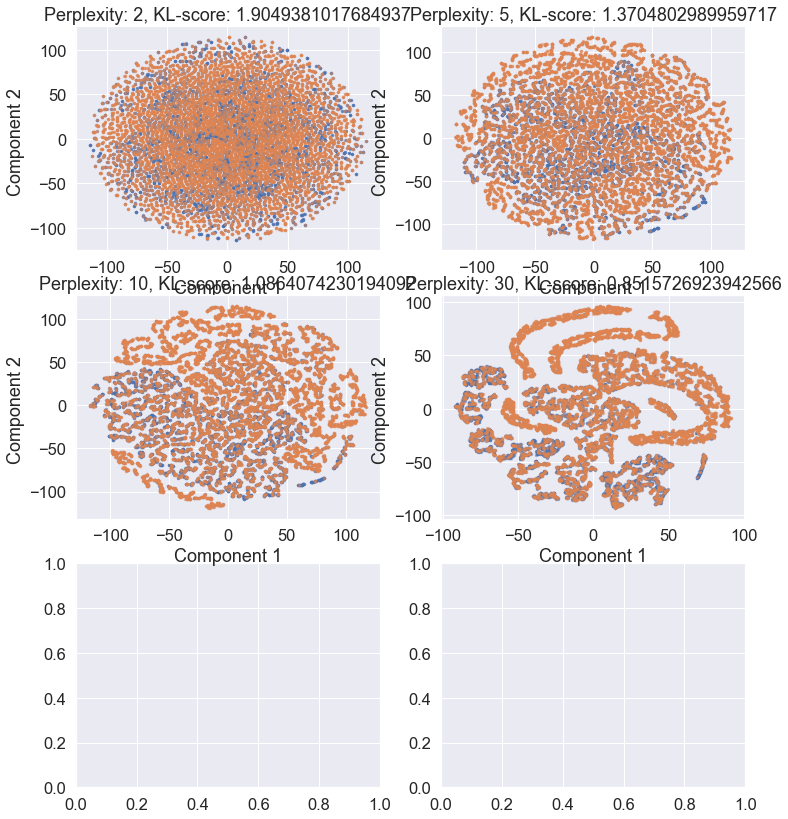

In [44]:
from sklearn.manifold import TSNE
# Your code goes here
sns.set(font_scale=1.5) # Set default font size
fig, ax = plt.subplots(3,2,figsize=(12,14))
for ii, perplexity in enumerate([2, 5, 10, 30, 50, 100]):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=10)
    X_tsne_2d = tsne.fit_transform(data_x)
    plt.subplot(3,2,ii+1)
    scatter_2d_label(X_tsne_2d, data_y)
    plt.title('Perplexity: {}, KL-score: {}'.format(perplexity, tsne.kl_divergence_))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2 ')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.5], scatterpoints=3)
fig.tight_layout()
plt.show()